In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv('Heart_Disease .csv')

In [28]:
data

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Diseased
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [29]:
ca=data['ca'].values
thal=data['thal'].values

In [30]:
caa=[]
for i in range(len(ca)):
    if ca[i]=='?':
        ca[i]='1'

In [31]:
for i in range(len(thal)):
    if thal[i]=='?':
        thal[i]='3'

In [32]:
# data.head()
# data.fillna(data.mean(), inplace=True)

# data_encoded = pd.get_dummies(data, drop_first=True)
#for i in range(len (y)):



In [33]:
data

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Diseased
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [34]:
X = data.drop(columns=['Diseased']) 
y = data['Diseased']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
dt_model = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [37]:
y_pred_dt = dt_model.predict(X_test)


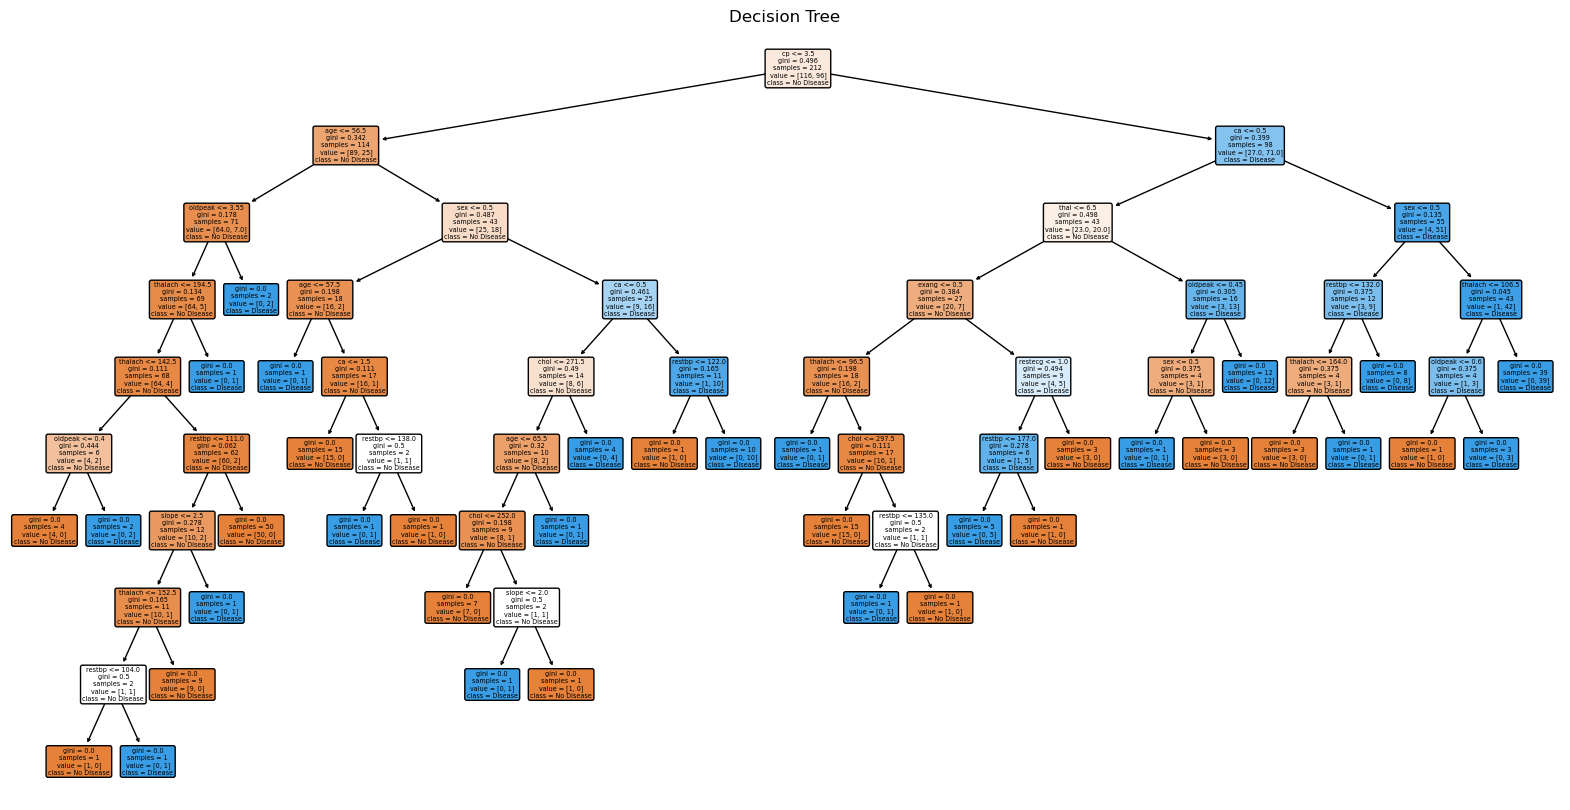

In [38]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'], rounded=True)
plt.title('Decision Tree')
plt.show()


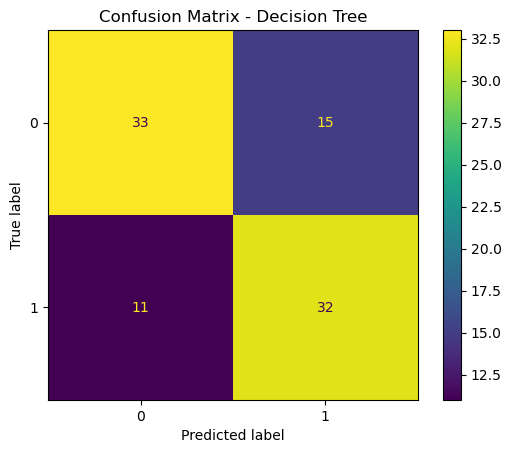

In [39]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot()
plt.title('Confusion Matrix - Decision Tree')
plt.show()


In [40]:
cv_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=5)
print(f"Cross-validation scores (Decision Tree): {cv_scores_dt}")


Cross-validation scores (Decision Tree): [0.6744186  0.65116279 0.66666667 0.61904762 0.88095238]


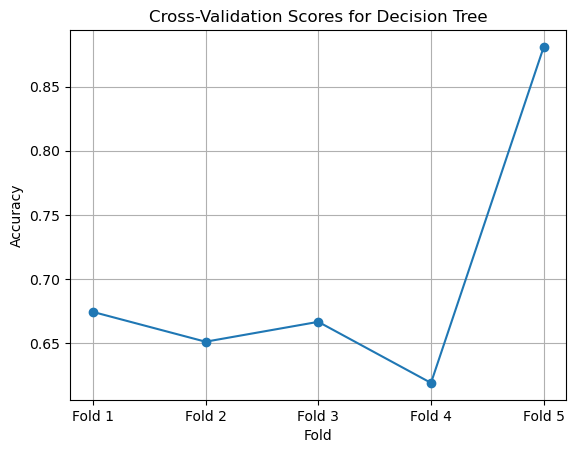

In [41]:
plt.plot(cv_scores_dt, marker='o')
plt.title('Cross-Validation Scores for Decision Tree')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(cv_scores_dt)), labels=[f'Fold {i+1}' for i in range(len(cv_scores_dt))])
plt.grid()
plt.show()


In [42]:
X_train

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,65,1,1,138,282,1,2,174,0,1.4,2,1,3
72,62,1,4,120,267,0,0,99,1,1.8,2,2,7
15,57,1,3,150,168,0,0,174,0,1.6,1,0,3
10,57,1,4,140,192,0,0,148,0,0.4,2,0,6
163,58,0,4,100,248,0,2,122,0,1.0,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,54,1,2,192,283,0,2,195,0,0.0,1,1,7
71,67,1,4,125,254,1,0,163,0,0.2,2,2,7
106,59,1,4,140,177,0,0,162,1,0.0,1,1,7
270,61,1,4,140,207,0,2,138,1,1.9,1,1,7


In [43]:
X_test

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,53,1,3,130,246,1,2,173,0,0.0,1,3,3
228,54,1,4,110,206,0,2,108,1,0.0,2,1,3
111,56,1,4,125,249,1,2,144,1,1.2,2,1,3
246,58,1,4,100,234,0,0,156,0,0.1,1,1,7
60,51,0,4,130,305,0,0,142,1,1.2,2,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,57,1,4,110,201,0,0,126,1,1.5,2,0,6
19,49,1,2,130,266,0,0,171,0,0.6,1,0,3
143,64,1,3,125,309,0,0,131,1,1.8,2,0,7
79,58,1,4,150,270,0,2,111,1,0.8,1,0,7


In [44]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [45]:

y_pred_rf = rf_model.predict(X_test)


In [46]:
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)
print("Feature Importance:\n", importance_df)


Feature Importance:
     Feature  Importance
2        cp    0.131005
7   thalach    0.124980
11       ca    0.117825
12     thal    0.097707
0       age    0.089397
9   oldpeak    0.088713
3    restbp    0.081397
4      chol    0.078352
8     exang    0.073233
1       sex    0.047567
10    slope    0.043198
6   restecg    0.017804
5       fbs    0.008821


In [47]:
X

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3


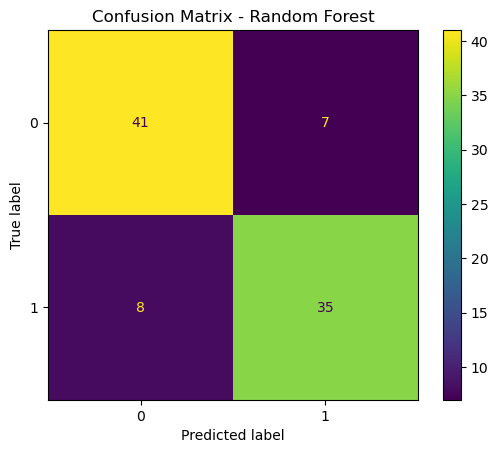

In [48]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [49]:
y_test

179    0
228    1
111    1
246    1
60     1
      ..
250    0
19     0
143    1
79     1
144    0
Name: Diseased, Length: 91, dtype: int64

In [50]:
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Cross-validation scores (Random Forest): {cv_scores_rf}")



Cross-validation scores (Random Forest): [0.79069767 0.81395349 0.83333333 0.76190476 0.83333333]


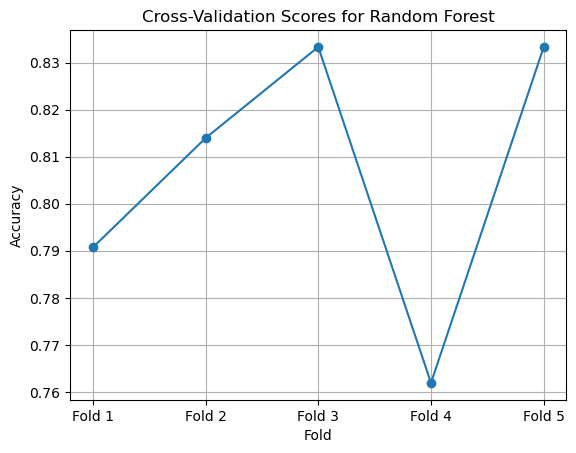

In [51]:
plt.plot(cv_scores_rf, marker='o')
plt.title('Cross-Validation Scores for Random Forest')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(cv_scores_rf)), labels=[f'Fold {i+1}' for i in range(len(cv_scores_rf))])
plt.grid()
plt.show()


In [52]:
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        48
           1       0.83      0.81      0.82        43

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



In [53]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'max_features': ['sqrt', 'log2', None]
}


In [54]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=200; total time=   0.1s
[CV] END ...max_depth=5, max_features=sqrt, n_e

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15, None],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [55]:

y_pred_best_rf = rf_model.predict(X_test)


In [56]:

best_params = grid_search.best_params_

n_estimators_best = best_params['n_estimators']
max_depth = best_params['max_depth']
max_features = best_params['max_features']
print("Classification Report for Optimized Random Forest:")
print(f"Best n_estimators: {n_estimators_best}")
print(f"maximum depth: {max_depth}")
print(f"maximum features: {max_features}")


Classification Report for Optimized Random Forest:
Best n_estimators: 50
maximum depth: 15
maximum features: sqrt
